# Super Store Sales Data Analysis

In [1]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('../data/clean_super_store_data.csv' )

In [3]:
# Setting opiton for showing all columns
pd.set_option('display.max_columns', None)

In [4]:
# Inforamtion about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_name          9993 non-null   object 
 1   customer_segment       9993 non-null   object 
 2   region                 9993 non-null   object 
 3   state                  9993 non-null   object 
 4   city                   9993 non-null   object 
 5   product_name           9993 non-null   object 
 6   category               9993 non-null   object 
 7   sub_category           9993 non-null   object 
 8   order_date             9993 non-null   object 
 9   order_month            9993 non-null   int64  
 10  order_year             9993 non-null   int64  
 11  ship_date              9993 non-null   object 
 12  ship_month             9993 non-null   int64  
 13  ship_year              9993 non-null   int64  
 14  delivery_time_in_days  9993 non-null   int64  
 15  ship

## Customer Segment Analysis

#### Customer Count In Customer Segement

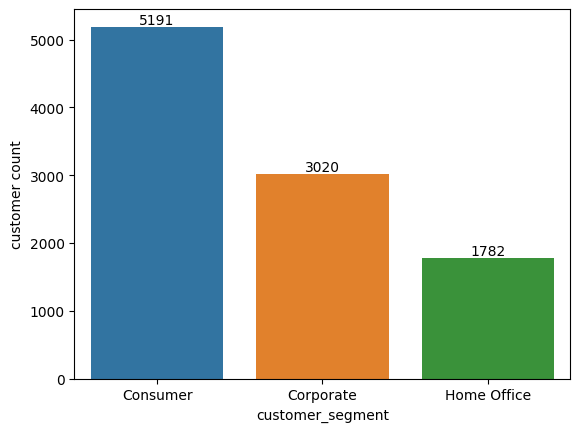

In [5]:
ax = sns.countplot(data = df , x = 'customer_segment' , hue = 'customer_segment' )
ax.set(ylabel= 'customer count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Revenue Generated By Each Customer Segment

In [6]:
cust_seg_rev = df.groupby('customer_segment')['sales'].sum().reset_index(name= 'revenue')

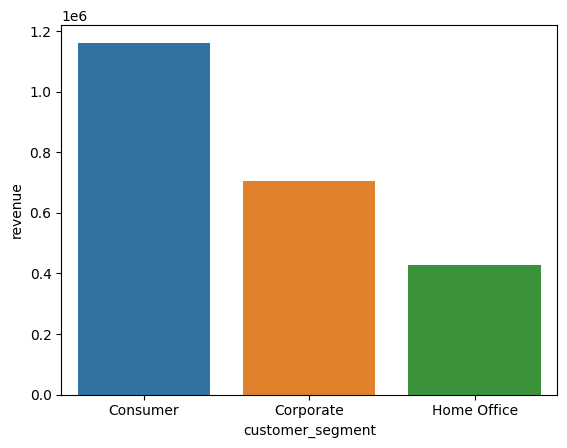

In [7]:
ax = sns.barplot(data= cust_seg_rev , x = 'customer_segment' , y = 'revenue' , hue= 'customer_segment')
plt.show()

In [8]:
# Dividing the customer revenue by 1 million
cust_seg_rev['revenue'] = cust_seg_rev['revenue'] / 1000000

In [9]:
# Format the values to show as million dollar
cust_seg_rev['revenue'] = cust_seg_rev['revenue'].map('${:,.2f}M'.format)

In [10]:
cust_seg_rev

,customer_segment,revenue
0,Consumer,$1.16M
1,Corporate,$0.71M
2,Home Office,$0.43M


#### Profit Generated By Each Customer Segment

In [11]:
cust_seg_profit = df.groupby('customer_segment')['profit'].sum().reset_index(name= 'profit')
cust_seg_profit

,customer_segment,profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60310.7373


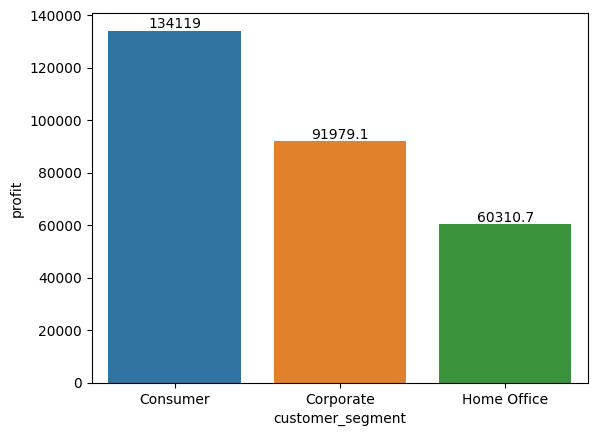

In [12]:
ax = sns.barplot(data =  cust_seg_profit , x = 'customer_segment' , y = 'profit' , hue= 'customer_segment' )
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Revenue Generated By Each Customer Segment In Each Year

In [13]:
cust_seg_rev_y = df.groupby(['customer_segment' , 'ship_year'])['sales'].sum().reset_index(name= 'revenue')
cust_seg_rev_y

,customer_segment,ship_year,revenue
0,Consumer,2011,263436.4766
1,Consumer,2012,265223.0893
2,Consumer,2013,296328.4252
3,Consumer,2014,331767.1671
4,Consumer,2015,4646.1868
5,Corporate,2011,120263.0307
6,Corporate,2012,135960.6899
7,Corporate,2013,204791.9348
8,Corporate,2014,243568.1234
9,Corporate,2015,1562.5880


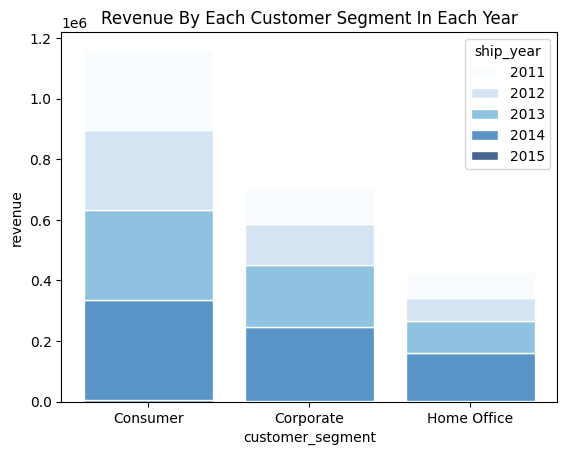

In [14]:
ax = sns.histplot(
    cust_seg_rev_y,
    x='customer_segment',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='revenue',
    hue='ship_year',
    multiple='stack',
    palette='Blues' ,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
ax.set_title('Revenue By Each Customer Segment In Each Year')
# Add ylabel.
ax.set_ylabel('revenue')
plt.show()

From the above graphs we can see that maximum number of customers `(5191)` are from `Consumer` customer_segment . 

So other analysis of customer_segment follow `Consumer`  customer_segment :

* `Maximum revenue` was generated by `Consumer segment ($1.6 M)`
* `Maximum profit` was generated by `Consumer segment ($ 134,119)`
* In each year Consumer segment generated highest revenue

## Customer Anaysis

#### Top 5 Customers interms of Sales

In [15]:
top_5_customer = df.groupby(['customer_name'])['sales'].sum().reset_index(name= 'revenue').sort_values(by = 'revenue' , ascending=False).head(5)
top_5_customer

,customer_name,revenue
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571


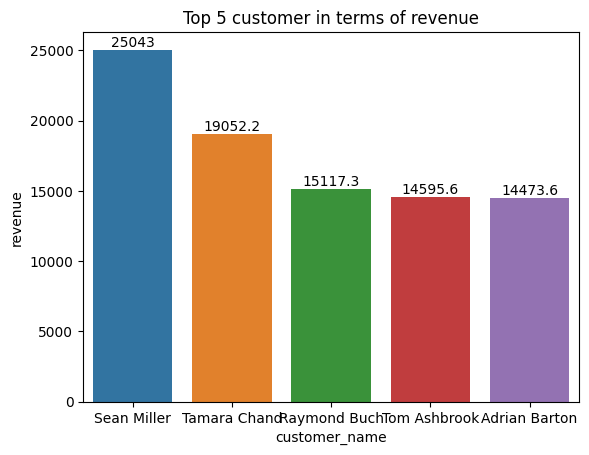

In [16]:
ax = sns.barplot(data = top_5_customer , x = 'customer_name' , y= 'revenue' , hue = 'customer_name' )
plt.title('Top 5 customer in terms of revenue')
# sns.set_theme({'figure.figsize' : (7 ,4)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top 5 Profitable Customers

In [17]:
top_5_profitable_customer = df.groupby(['customer_name'])['profit'].sum().reset_index(name= 'profit').sort_values(by = 'profit' , ascending=False).head(5)
top_5_profitable_customer

,customer_name,profit
730,Tamara Chand,8981.3239
622,Raymond Buch,6976.0959
671,Sanjit Chand,5757.4119
334,Hunter Lopez,5622.4292
6,Adrian Barton,5444.8055


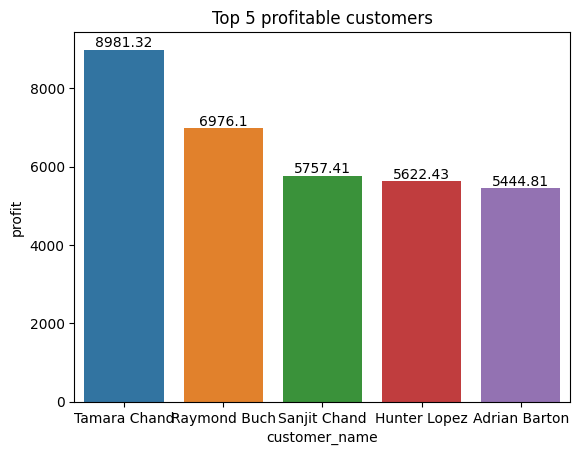

In [18]:
ax = sns.barplot(data = top_5_profitable_customer , x = 'customer_name' , y= 'profit' , hue = 'customer_name' )
plt.title('Top 5 profitable customers')
# sns.set_theme({'figure.figsize' : (7 ,4)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

* In `revenue analysis Sean Miller ($25043)` is the `top customer` and the `2nd highest` revenue generator customer was `Tamara Chand ($19052)`. <br>

* In `profit analysis Sean Miller` was not in the top 5 customer list but  `Tamara Chand ($8981)` was the `top customer`. <br>
<br>
So, from both analysis `Tamara Chand` is evolved as most `valuable customer` .

## Regional Analysis

#### Customer Count by Region

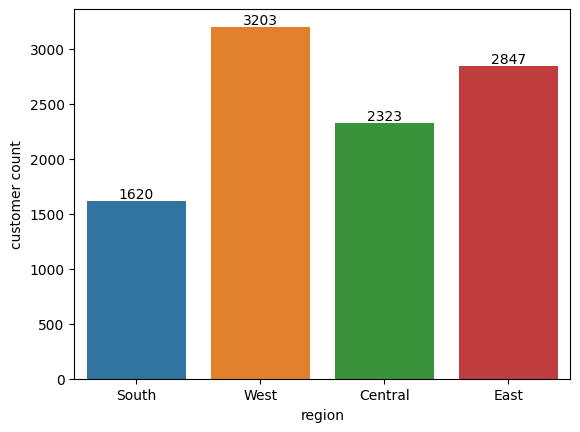

In [19]:
ax = sns.countplot(data = df , x = 'region' , hue = 'region' )
ax.set(ylabel= 'customer count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Revenue by Region

In [20]:
revenue_reg = df.groupby(['region'])['sales'].sum().reset_index(name= 'revenue').sort_values( by= 'revenue' , ascending= False )
revenue_reg

,region,revenue
3,West,725457.8245
1,East,678499.8680
0,Central,501239.8908
2,South,391721.9050


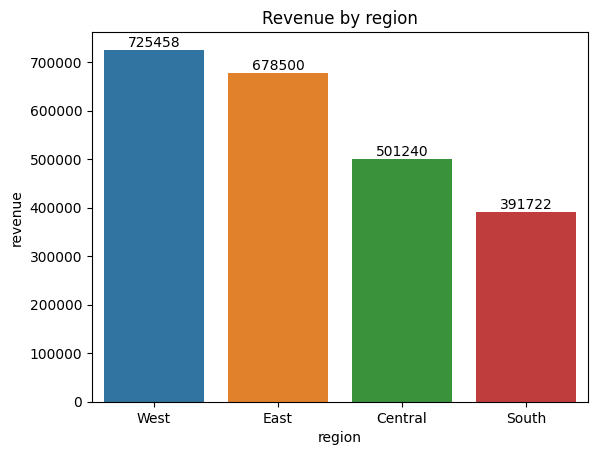

In [21]:
ax = sns.barplot(data = revenue_reg , x = 'region' , y= 'revenue' , hue = 'region' )
plt.title('Revenue by region')
# sns.set_theme({'figure.figsize' : (7 ,4)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Profit by Region

In [22]:
profit_reg = df.groupby(['region'])['profit'].sum().reset_index(name= 'profit').sort_values( by= 'profit' , ascending= False )
profit_reg

,region,profit
3,West,108418.4489
1,East,91534.8388
2,South,46749.4303
0,Central,39706.3625


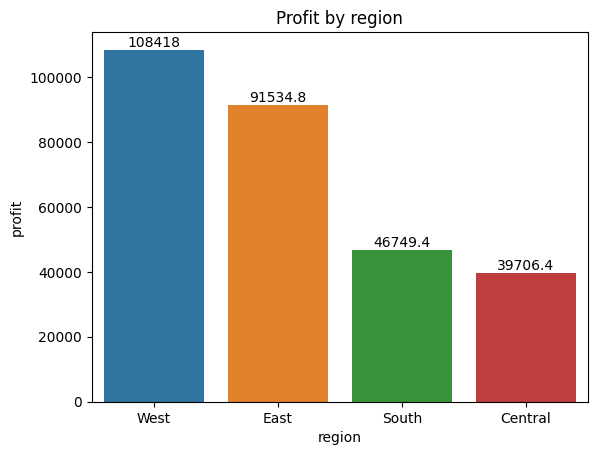

In [23]:
ax = sns.barplot(data = profit_reg , x = 'region' , y= 'profit' , hue = 'region' )
plt.title('Profit by region')
# sns.set_theme({'figure.figsize' : (7 ,4)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Revenue Generated By Each region In Each Year

In [24]:
region_rev_y = df.groupby(['region' , 'ship_year'])['sales'].sum().reset_index(name= 'revenue')
region_rev_y

,region,ship_year,revenue
0,Central,2011,102899.8606
1,Central,2012,103222.5780
2,Central,2013,146225.8940
3,Central,2014,147991.2334
4,Central,2015,900.3248
5,East,2011,119710.8710
6,East,2012,164991.7110
7,East,2013,177437.3720
8,East,2014,215752.5180
9,East,2015,607.3960


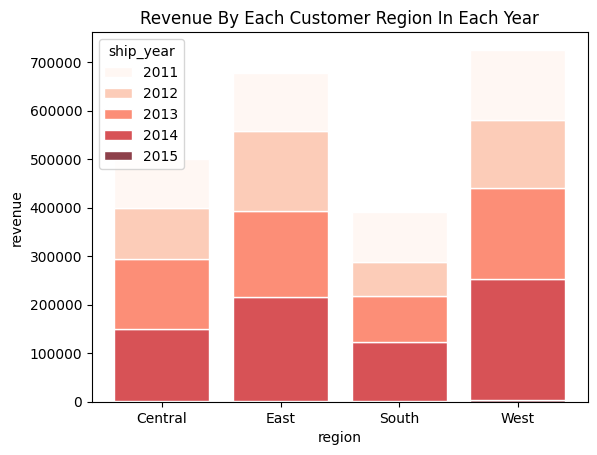

In [25]:
ax = sns.histplot(
    region_rev_y,
    x='region',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='revenue',
    hue='ship_year',
    multiple='stack',
    palette='Reds' ,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
ax.set_title('Revenue By Each Customer Region In Each Year')
# Add ylabel.
ax.set_ylabel('revenue')
plt.show()

From the above graphs we can see that `maximum customers (3203)` were from `west region`  and `minimum customers (1620)` were from `south region` .
So other analysis of region follows `west region`  customer_segment :

* `Maximum revenue` was generated by `west region ($725458)`
* `Maximum profit` was generated by `west region ($108418)`
* In every year `west region` generated maximum revenue

Intersting matter is that `South region` had minimum customers . But in profit generation it was the `3rd highest` profit generator region among the four regions .

## State Anaysis

#### Top 5 state by customer count

In [26]:
top_5_state_customer = df.groupby(['state'])['state'].count().reset_index(name= 'customer count').sort_values( by= 'customer count' , ascending= False ).head(5)
top_5_state_customer

,state,customer count
3,California,2001
30,New York,1128
41,Texas,985
36,Pennsylvania,587
45,Washington,506


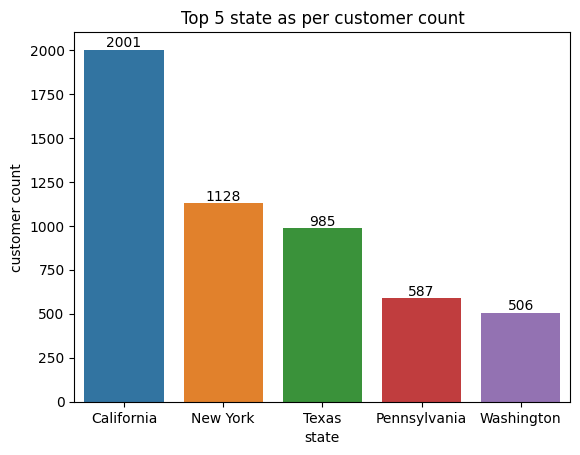

In [27]:
ax = sns.barplot(data = top_5_state_customer , x = 'state' , y= 'customer count' , hue = 'state' )
plt.title('Top 5 state as per customer count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top 5 state by revenue

In [28]:
top_5_state_rev = df.groupby(['state'])['sales'].sum().reset_index(name= 'revenue').sort_values( by= 'revenue' , ascending= False ).head(5)
top_5_state_rev

,state,revenue
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140


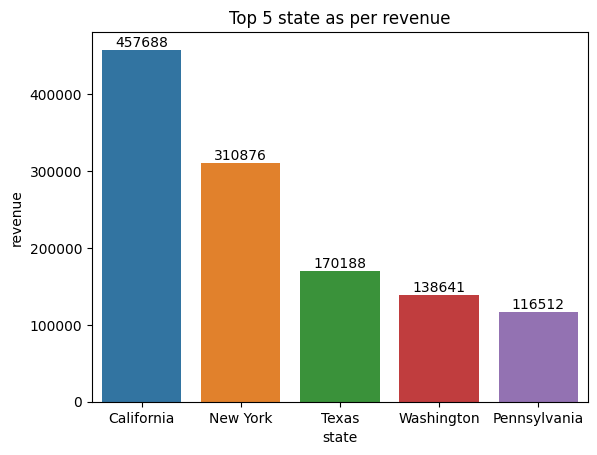

In [29]:
ax = sns.barplot(data = top_5_state_rev , x = 'state' , y= 'revenue' , hue = 'state' )
plt.title('Top 5 state as per revenue')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top 5 state by profit 

In [30]:
top_5_profitable_state =df.groupby(['state'])['profit'].sum().reset_index(name= 'profit').sort_values( by= 'profit' , ascending= False ).head(5)
top_5_profitable_state

,state,profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504


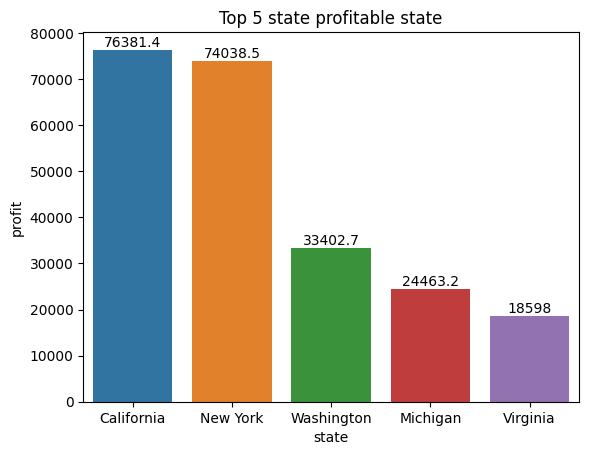

In [31]:
ax = sns.barplot(data = top_5_profitable_state , x = 'state' , y= 'profit' , hue = 'state' )
plt.title('Top 5 state profitable state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

##### Comparison of profit among Texas , Pennsylvania , Michigan and Virginia state

In [32]:
pofit_com_state = df.query("state in ('Texas' , 'Pennsylvania' , 'Michigan' , 'Virginia')")[['state' , 'profit']].groupby(['state']).sum().sort_values(by = 'profit' ,ascending= False)
pofit_com_state

,profit
state,
Michigan,24463.1876
Virginia,18597.9504
Pennsylvania,-15559.9603
Texas,-25729.3563


* From the above graphs we can see that from top 5 state `maximum customers` were from` California State (2001)` and `minimum customers` were from `Washington (506)`.

* In the revenue section we can see that maximum revenue was generated also from `California State ($457687)`  but minimum was generated from `Pennsylvania state ($116511)` . Although `Pennsylvania state` holds more `customer (587)` than `Washington state (506)` but was generated less revenue than `Washington state ($138641)`

* In the profit section we can see different scenario. Profit Generartion states didn't follow the all aspects of customer distribution of states . 

    Top profit generation state was `California State ($76381)` which followed the customer distribuiton and revenue distribution.
    `Washington state ` holds `minimum customer (506)` interms of top 5 states . But in `revenue genration` it holds the `4th position ($138641)` . Alongside it holds` 3rd postion ($33402)` in `profit generation` .

    In pofit section` 4th and 5th postion` is obtained by `Michigan ($24463) and Virginia ($18598)` . But `Michigan` and `Virginia` doesn't hold any positon in top 5 customer distribution and revenue distribution .

     From the above query we can see that `Texas` and `Penniserlvia` cities incurred `loss` of `($25729)` and `($15559) `respectively . As a result  `Texas` and `Penniserlvia` are not included in the top 5 profitable state.


## City Analysis

#### Top 5 city by customer count  

In [33]:
top_5_city_customer = df.groupby(['city'])['city'].count().reset_index(name= 'customer count').sort_values(by = 'customer count' , ascending=False).head(5)
top_5_city_customer

,city,customer count
329,New York City,915
266,Los Angeles,747
374,Philadelphia,537
438,San Francisco,510
452,Seattle,428


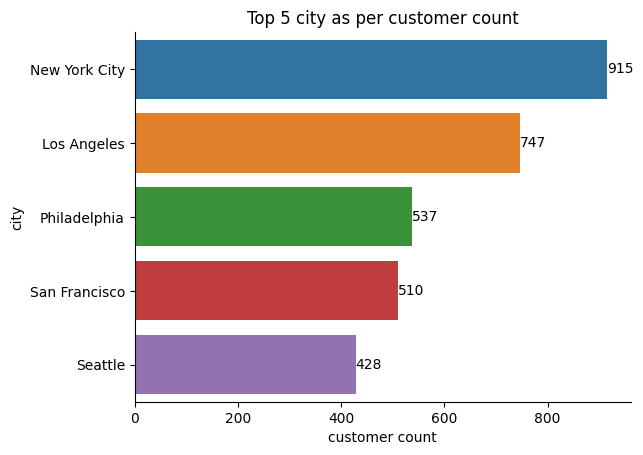

In [34]:
ax = sns.barplot(data = top_5_city_customer , x = 'customer count' , y= 'city' , hue = 'city' )
plt.title('Top 5 city as per customer count')
sns.despine()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top 5 city by revenue

In [35]:
top_5_city_revenue = df.groupby(['city'])['sales'].sum().reset_index(name= 'revenue').sort_values(by = 'revenue' , ascending=False).head(5)
top_5_city_revenue

,city,revenue
329,New York City,256368.161
266,Los Angeles,175851.341
452,Seattle,119540.742
438,San Francisco,112669.092
374,Philadelphia,109077.013


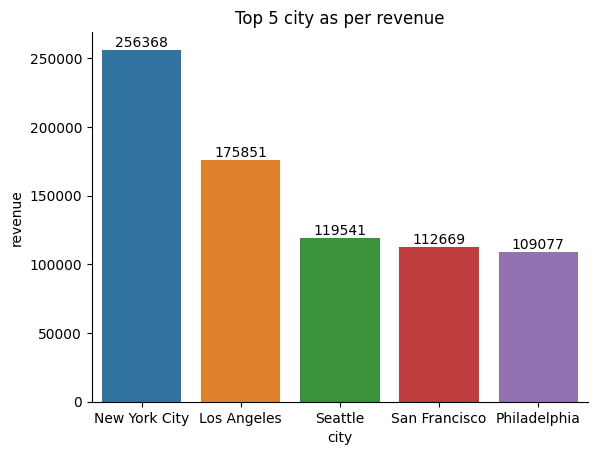

In [36]:
ax = sns.barplot(data = top_5_city_revenue , x = 'city' , y= 'revenue' , hue = 'city' )
plt.title('Top 5 city as per revenue')
sns.despine()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top 5 city by profit

In [37]:
top_5_city_profit = df.groupby(['city'])['profit'].sum().reset_index(name= 'profit').sort_values(by = 'profit' , ascending=False).head(5)
top_5_city_profit

,city,profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908


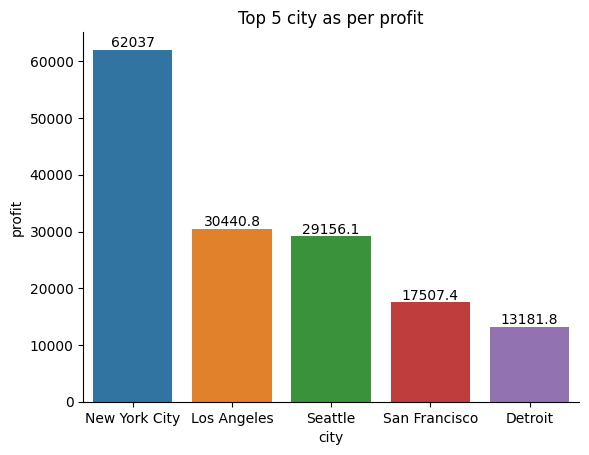

In [38]:
ax = sns.barplot(data = top_5_city_profit , x = 'city' , y= 'profit' , hue = 'city' )
plt.title('Top 5 city as per profit')
sns.despine()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

##### Comparison of profit between Philadelphia city and Detroit city

In [39]:
pofit_com_city= df.query("city in ('Philadelphia' , 'Detroit')")[['city' , 'profit']].groupby(['city']).sum().sort_values(by = 'profit' ,ascending= False)
pofit_com_city

,profit
city,
Detroit,13181.7908
Philadelphia,-13837.7674


* From the above graphs we can see that from top 5 city `maximum customers` are from` New York City (915)` and `minimum customers` are from `Seattle (428)` city.

* In the revenue section we can see that maximum revenue is generated also from `New York City ($256368)`  but minimum is generated from `Philadelphia city ($109077)` . Although `Philadelphia city` holds more `customer (537)` than `San Francisco city (510)` and `Seattle city (428)` but generate less revenue than `San Francisco city ($112669)` and `Seattle city ($119540)`

* In the profit section we can see :

    Top profit generation city is `New York City ($62036)` which follows the customer distribuiton and revenue distribution.

    In pofit section`5th postion` is obtained by `Detroit ($13181) city` . But `Philadelphia city doesn't exists` in profit section. Though this city exists in `3rd position in customer distribution` and `5th position in revenue distribution`. 

    From the above query of profit between `Philadelphia city and Detroit city` , we can see that` Philadelphia city incurred loss of ($13837)` . But `Detroit city` is generated proft of ($13181). This is why Detroit city obtained 5th postion in profit distribution.

## Product Category Analysis

#### Customer count by product category

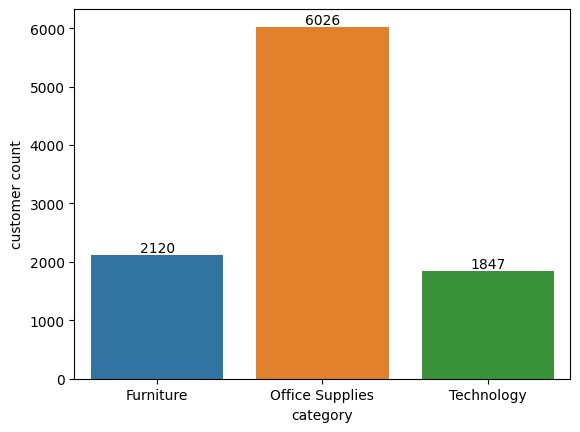

In [40]:
ax = sns.countplot(data = df , x = 'category' , hue = 'category' )
ax.set(ylabel= 'customer count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Revenue by product category

In [41]:
revenue_ctg = df.groupby(['category'])['sales'].sum().reset_index(name= 'revenue').sort_values( by= 'revenue' , ascending= False )
revenue_ctg

,category,revenue
2,Technology,836154.0330
0,Furniture,741718.4233
1,Office Supplies,719047.0320


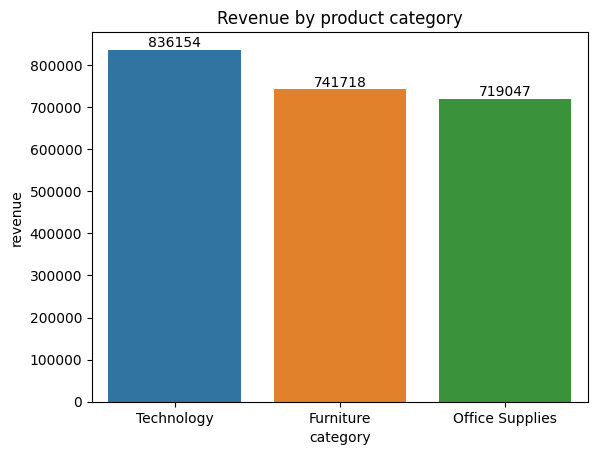

In [42]:
ax = sns.barplot(data = revenue_ctg , x = 'category' , y= 'revenue' , hue = 'category' )
plt.title('Revenue by product category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Profit by product category

In [43]:
profit_ctg = df.groupby(['category'])['profit'].sum().reset_index(name= 'profit').sort_values( by= 'profit' , ascending= False )
profit_ctg

,category,profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18463.3316


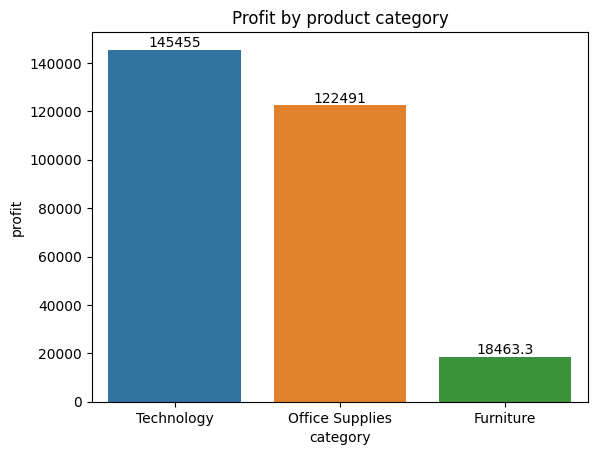

In [44]:
ax = sns.barplot(data = profit_ctg , x = 'category' , y= 'profit' , hue = 'category' )
plt.title('Profit by product category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

* From the above graphs we can see that `maximum customers (6026)` purchased `Office Supplies` category products  and `minimum customers (1847)` purchased `Technology category` products .

 * In revenue analysis we can see that `Technology category ($836154)` contributes `maximum revenue` . `Furniture ($741718)` and `Office Supplies($719047)` hold the` 2nd and 3rd postiton` repsectively in revenue distribution. Technology and Furniture category hold less customer than Office Supplies category but contribute more rvenue than Office Supplies category . Because products of Technology and Furniture category are more expensive than products of Office Supplies .

* In profit analysis we can see that `Technology category ($145454)` contributes `maximum profit` . `Office Supplies($122490)` and `Furniture ($18463)` hold the` 2nd and 3rd postiton` repsectively in profit distribution. Here Office Supplies category provides more profit than Furniture category becuse lower cost of Office Supplies category products .

## Product Analysis

#### Top 10 selling products interms of quntity

In [45]:
top_10_product_qyt = df.groupby(['product_name' ])['quantity'].sum().reset_index().sort_values(by='quantity' ,ascending= False).head(10)
top_10_product_qyt

,product_name,quantity
1491,Staples,876
940,KI Adjustable-Height Table,74
1502,Storex Dura Pro Binders,71
258,Avery Non-Stick Binders,71
697,GBC Premium Transparent Covers with Diagonal L...,67
1448,"Situations Contoured Folding Chairs, 4/Set",64
427,Chromcraft Round Conference Tables,61
589,Eldon Wave Desk Accessories,61
1633,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,59
770,"Global Wood Trimmed Manager's Task Chair, Khaki",59


#### Top 10 products interms of revenue

In [46]:
top_10_product_rev =df.groupby(['product_name' ])['sales'].sum().reset_index(name= 'revenue').sort_values(by='revenue' ,ascending= False).head(10)
top_10_product_rev

,product_name,revenue
403,Canon imageCLASS 2200 Advanced Copier,61599.824
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
443,Cisco TelePresence System EX90 Videoconferenci...,22638.480
784,HON 5400 Series Task Chairs for Big and Tall,21870.576
684,GBC DocuBind TL300 Electric Binding System,19823.479
686,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
803,Hewlett Packard LaserJet 3310 Copier,18839.686
785,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
681,GBC DocuBind P400 Electric Binding System,17965.068
811,High Speed Automatic Electric Letter Opener,17030.312


#### Top 10 profitable products

In [47]:
top_10_product_profit =df.groupby(['product_name' ])['profit'].sum().reset_index(name= 'profit').sort_values(by='profit' ,ascending= False).head(10)
top_10_product_profit

,product_name,profit
403,Canon imageCLASS 2200 Advanced Copier,25199.9280
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
803,Hewlett Packard LaserJet 3310 Copier,6983.8836
399,Canon PC1060 Personal Laser Copier,4570.9347
785,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
164,Ativa V4110MDD Micro-Cut Shredder,3772.9461
18,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1274,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
893,Ibico EPK-21 Electric Binding System,3345.2823
1831,Zebra ZM400 Thermal Label Printer,3343.5360


#### Top 10 costlier product

In [48]:
top_10_product_cost = df.groupby(['product_name' ])['cost'].sum().reset_index(name= 'cost').sort_values(by='cost' ,ascending= False).head(10)
top_10_product_cost

,product_name,cost
403,Canon imageCLASS 2200 Advanced Copier,36399.89
443,Cisco TelePresence System EX90 Videoconferenci...,24449.56
784,HON 5400 Series Task Chairs for Big and Tall,21870.58
983,Lexmark MX611dhe Monochrome Laser Printer,21419.87
474,Cubify CubeX 3D Printer Double Head Print,19979.94
681,GBC DocuBind P400 Electric Binding System,19843.24
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,19700.35
686,GBC Ibimaster 500 Manual ProClick Binding System,18263.52
1041,Martin Yale Chadless Opener Electric Letter Op...,17955.39
684,GBC DocuBind TL300 Electric Binding System,17589.96


#### Top 10 discounted products

In [49]:
top_10_product_discounted = df.groupby(['product_name' ])['discount_amount'].sum().reset_index(name= 'discount_amount').sort_values(by='discount_amount' ,ascending= False).head(10)
top_10_product_discounted

,product_name,discount_amount
443,Cisco TelePresence System EX90 Videoconferenci...,11319.24
983,Lexmark MX611dhe Monochrome Laser Printer,6578.96
403,Canon imageCLASS 2200 Advanced Copier,5599.98
474,Cubify CubeX 3D Printer Double Head Print,5369.99
681,GBC DocuBind P400 Electric Binding System,5280.64
686,GBC Ibimaster 500 Manual ProClick Binding System,5250.74
684,GBC DocuBind TL300 Electric Binding System,4458.05
784,HON 5400 Series Task Chairs for Big and Tall,4079.69
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,4067.18
475,Cubify CubeX 3D Printer Triple Head Print,3999.99


## Delivery time Analysis

#### Average delivery time

In [50]:
avg_delivery_time =  df['delivery_time_in_days'].mean()
avg_delivery_time

np.float64(3.958871209846893)

Average delivery time is 4 days

#### Relationship between average delivery time and revenue in each year

In [51]:
corr_sales_avg_delivery_time = df.groupby(['ship_year'])[['delivery_time_in_days' , 'sales']].agg({ 'delivery_time_in_days' : 'mean' , 'sales' : 'sum' })
corr_sales_avg_delivery_time

,delivery_time_in_days,sales
ship_year,,
2011,3.982465,470101.8211
2012,4.022994,479442.5020
2013,3.938402,606285.4570
2014,3.905740,733727.5494
2015,4.916667,7362.1588


<Axes: xlabel='delivery_time_in_days', ylabel='sales'>

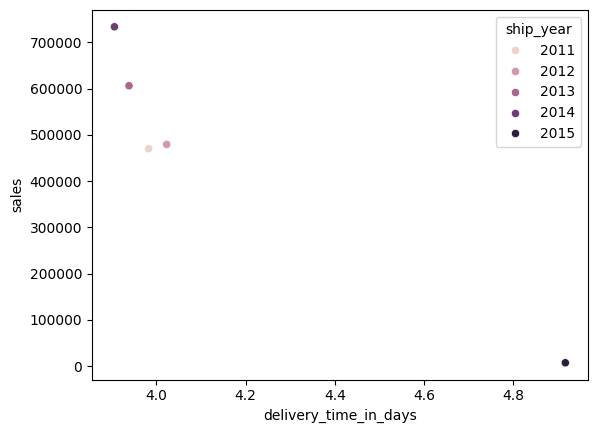

In [52]:
sns.scatterplot(data= corr_sales_avg_delivery_time ,  x = 'delivery_time_in_days' , y = 'sales' , hue= 'ship_year')

In this graph we can see that in 2012 , 2013 and 2014 as average delivery time was decreased total revenue was increased . In 2015 average delivery time was increased but the revenue value was too little compare to other years. Because year 2015 includes only January month.